# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [36]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [37]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(1,n+1):
            positions[i] = self.pickStep() + positions[i-1]
        return positions

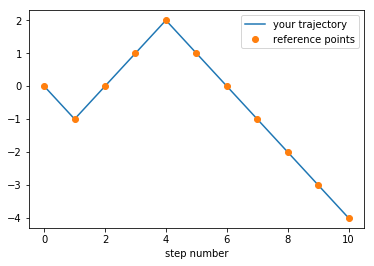

In [38]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

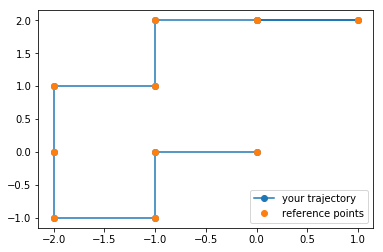

In [39]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

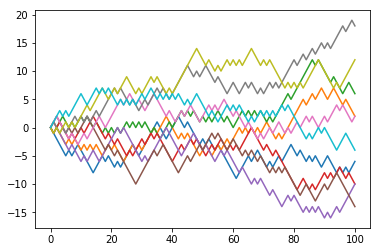

In [40]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


In [41]:
w = walker([0],1)
print(w.doSteps(10))
print(w.doSteps(10)[3])

[[0.]
 [1.]
 [2.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [4.]
 [5.]
 [6.]]
[3.]


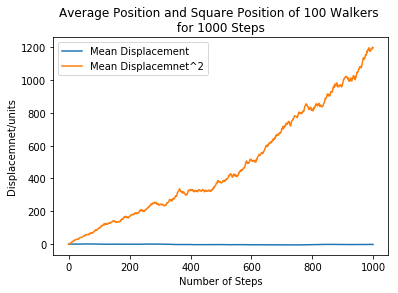

In [42]:
nsteps = 1000
ndim = 1
nwalkers = 100
w =  walker(numpy.zeros(ndim),ndim)
pos = numpy.zeros((nwalkers,nsteps+1))
mpos = numpy.zeros(nsteps)
mpos2 = numpy.zeros(nsteps)
for i in range(nwalkers):
    pos[i] = w.doSteps(nsteps)[:,0]
for i in range(nsteps):
    mpos[i] = numpy.sum(pos[:,i])/nwalkers
    mpos2[i] = numpy.sum(pos[:,i]**2)/nwalkers

plt.plot(range(nsteps),mpos, label = 'Mean Displacement')
plt.plot(range(nsteps),mpos2,label = 'Mean Displacemnet^2')
plt.title('Average Position and Square Position of 100 Walkers \n for 1000 Steps ')
plt.ylabel('Displacemnet/units')
plt.xlabel('Number of Steps')
plt.legend()
           
           
           
    
    
    
    

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


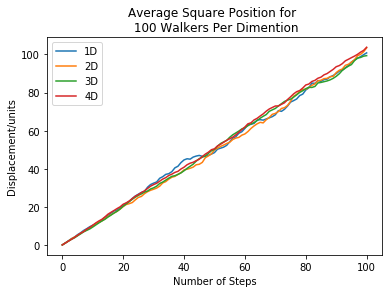

In [43]:
nsteps = 100
nwalkers = 400
dimetions = range(1,5)
w = []
pos1 = numpy.zeros((nwalkers,nsteps+1))
pos2 = numpy.zeros((nwalkers,nsteps+1,2))
pos3 = numpy.zeros((nwalkers,nsteps+1,3))
pos4 = numpy.zeros((nwalkers,nsteps+1,4))
mpos1 = numpy.zeros(nsteps+1)
mpos2 = numpy.zeros(nsteps+1)
mpos3 = numpy.zeros(nsteps+1)
mpos4 = numpy.zeros(nsteps+1)
for i in range(1,5):
    w.append(walker(numpy.zeros(i),i))
for i in range(nwalkers):
    pos1[i] = w[0].doSteps(nsteps)[:,0]
    pos2[i,:,:] = w[1].doSteps(nsteps)
    pos3[i,:,:] = w[2].doSteps(nsteps)
    pos4[i,:,:] = w[3].doSteps(nsteps)
for i in range(nsteps+1): 
    mpos1[i] = numpy.sum(pos1[:,i]**2)/nwalkers
    mpos2[i] = numpy.sum(pos2[:,i,:]**2)/nwalkers
    mpos3[i] = numpy.sum(pos3[:,i,:]**2)/nwalkers
    mpos4[i] = numpy.sum(pos4[:,i,:]**2)/nwalkers
  
plt.plot(range(nsteps+1),mpos1, label = '1D') 
plt.plot(range(nsteps+1),mpos2, label = '2D')
plt.plot(range(nsteps+1),mpos3, label = '3D')
plt.plot(range(nsteps+1),mpos4, label = '4D')    
plt.title('Average Square Position for \n 100 Walkers Per Dimention')
plt.xlabel('Number of Steps')
plt.ylabel('Displacement/units')
plt.legend()


## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


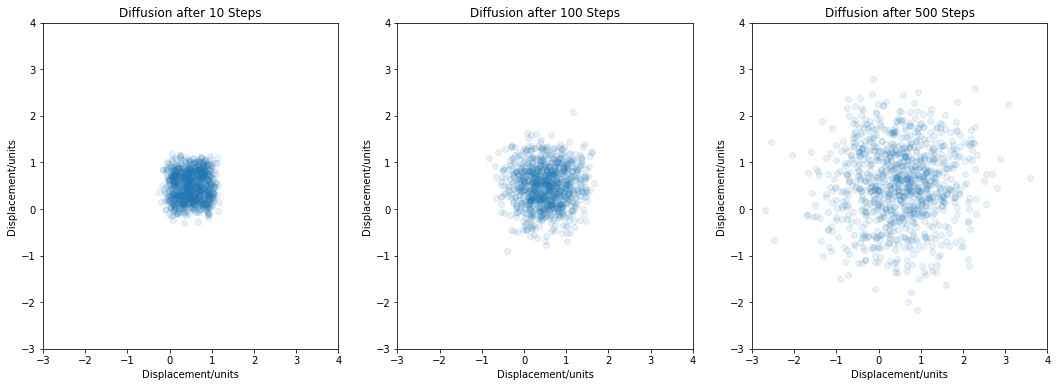

In [44]:
ndim=2
nwalkers=1000
nsteps = 500
w = []
rand_pos = numpy.random.uniform(size=(nwalkers, 2))
position = numpy.zeros((nwalkers,nsteps+1,2))
for i in range(nwalkers):
    w.append(walker(rand_pos[i],2,0.05))
for i in range(nwalkers):
     position[i,:,:] = w[i].doSteps(nsteps)
# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
v = ([10,100,500])
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("Diffusion after {} Steps".format(v[i]))    
    plt.scatter(position[:,v[i],0], position[:,v[i],1], alpha=0.1)
    plt.xlabel('Displacement/units')
    plt.ylabel('Displacement/units')